# Datenfehler

## Initialisierung

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import random
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model

In [2]:
def dfAddMissing(df, columns, percent):
    dfm = pd.DataFrame()
    for col in columns:
        dfm[col] = df[col]

    dfm = dfm.mask(np.random.random(dfm.shape) < percent / 100)

    for col in columns:
        df[col+"_missing"] = dfm[col]

    return df

def dfTimeSeries():
    df = pd.DataFrame(
        { "Datum":  pd.date_range(start='1-1-2020', periods=10, freq="1D"), 
        "Werte": [157.0, 142, 153, 161, 158, 149, 142, 138, 132, 136] })
    df["WerteM"] = df["Werte"]
    # Fehlende Werte erzeugen
    df.at[2, "WerteM"] = np.NaN
    df.at[5, "WerteM"] = np.NaN
    df.at[6, "WerteM"] = np.NaN
    df["Datum"] = pd.to_datetime(df["Datum"])
    return df

def dfStetigDiskret():
    df = pd.DataFrame({"Stetig":[-50.0,-5,20,50,100], "Diskret": [1.0,2,1,2,2]})
    df["StetigM"] = df["Stetig"]
    df["DiskretM"] = df["Diskret"]
    df.at[2, "StetigM"] = np.NaN
    df.at[2, "DiskretM"] = np.NaN
    return df

def dfPersonen():
    df = pd.DataFrame({"Name":["S1", "S2", "S3", "S4", "L1", "L2"], "Art": [1, 1, 1, 1, 2, 2], "Alter": [10.0, 11, 10, 9, 35, 57], "Note": [2.0,3,1,2,0,0]})
    df["AlterM"] = df["Alter"]
    df["NoteM"] = df["Note"]
    df.at[2, "AlterM"] = np.NaN
    df.at[1, "NoteM"] = np.NaN
    df.at[3, "NoteM"] = np.NaN
    return df

def dfCaliforniaHousing(percent = 5):
    data = fetch_california_housing()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    return dfAddMissing(df, ["MedInc" , "Population", "AveOccup"],  percent)


## Analyse

In [3]:
# california_housing dataset von Scikitlearn
df = dfCaliforniaHousing()

# Informationen über das DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
MedInc                20640 non-null float64
HouseAge              20640 non-null float64
AveRooms              20640 non-null float64
AveBedrms             20640 non-null float64
Population            20640 non-null float64
AveOccup              20640 non-null float64
Latitude              20640 non-null float64
Longitude             20640 non-null float64
MedInc_missing        19587 non-null float64
Population_missing    19619 non-null float64
AveOccup_missing      19601 non-null float64
dtypes: float64(11)
memory usage: 1.7 MB


In [4]:
# Anzahl NaN pro Spalte
df.isnull().sum().sort_values(ascending=False)

MedInc_missing        1053
AveOccup_missing      1039
Population_missing    1021
Longitude                0
Latitude                 0
AveOccup                 0
Population               0
AveBedrms                0
AveRooms                 0
HouseAge                 0
MedInc                   0
dtype: int64

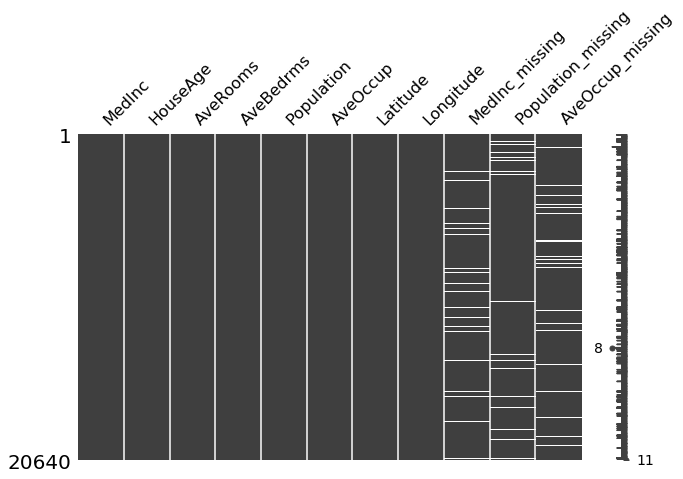

In [5]:
# MissingMo
# Verteilung der fehlenden Werte
msno.matrix(df, figsize=(10, 6))


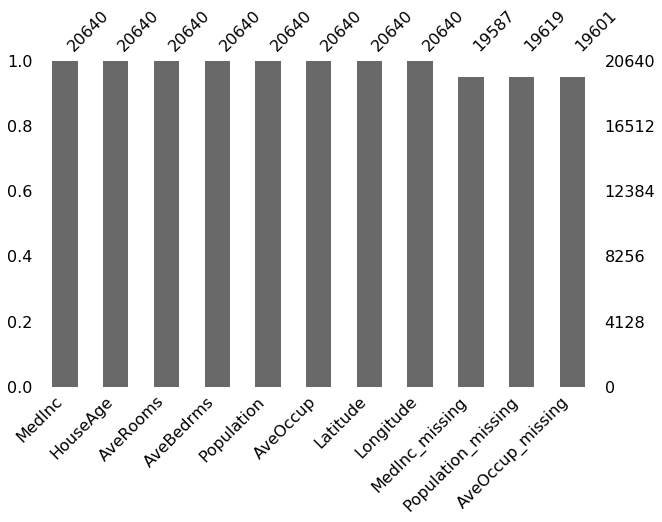

In [6]:
# Anzahl der fehlenden Werte pro Spalte
msno.bar(df, figsize=(10, 6))

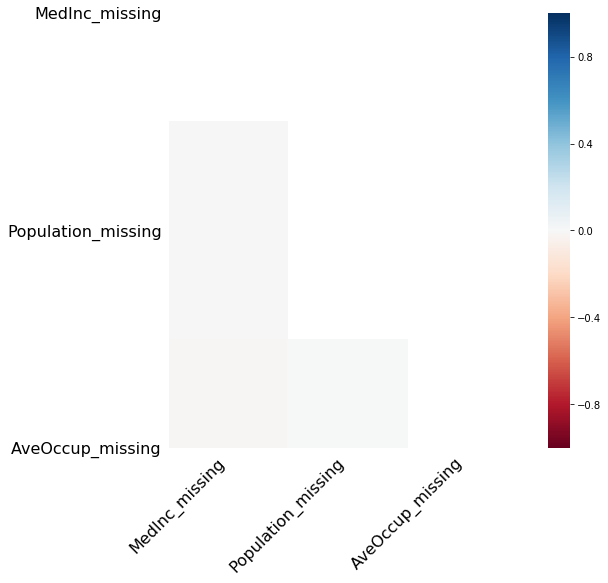

In [7]:
msno.heatmap(df, figsize=(8,8))


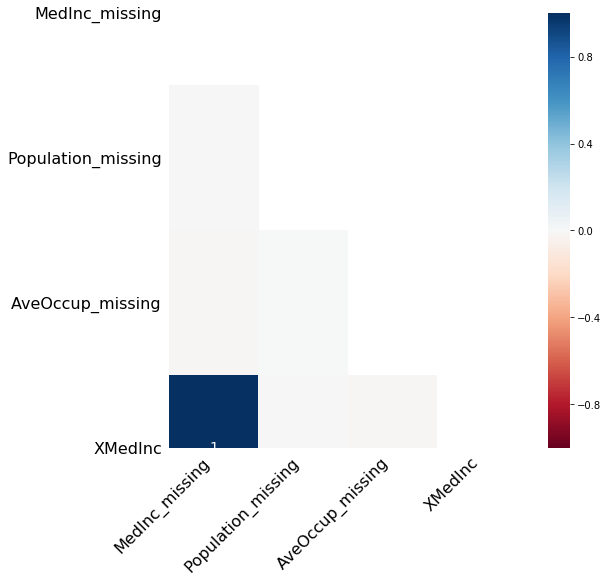

In [8]:
df["XMedInc"] = df["MedInc_missing"]
msno.heatmap(df, figsize=(8,8))


## Datensätze entfernen

In [9]:
df = dfTimeSeries()
df


,Datum,Werte,WerteM
0,2020-01-01,157.0,157.0
1,2020-01-02,142.0,142.0
2,2020-01-03,153.0,NaN
3,2020-01-04,161.0,161.0
4,2020-01-05,158.0,158.0
5,2020-01-06,149.0,NaN
6,2020-01-07,142.0,NaN
7,2020-01-08,138.0,138.0
8,2020-01-09,132.0,132.0
9,2020-01-10,136.0,136.0


In [10]:
df = df.dropna()
df

,Datum,Werte,WerteM
0,2020-01-01,157.0,157.0
1,2020-01-02,142.0,142.0
3,2020-01-04,161.0,161.0
4,2020-01-05,158.0,158.0
7,2020-01-08,138.0,138.0
8,2020-01-09,132.0,132.0
9,2020-01-10,136.0,136.0


## Konstanter Wert

In [11]:
df = dfStetigDiskret()
df["StetigKonst"] = df["StetigM"].fillna(0)
df["DiskretKonst"] = df["DiskretM"].fillna(1).astype('Int64')
df

,Stetig,Diskret,StetigM,DiskretM,StetigKonst,DiskretKonst
0,-50.0,1.0,-50.0,1.0,-50.0,1
1,-5.0,2.0,-5.0,2.0,-5.0,2
2,20.0,1.0,NaN,NaN,0.0,1
3,50.0,2.0,50.0,2.0,50.0,2
4,100.0,2.0,100.0,2.0,100.0,2


## Mittelwert, Median

In [12]:
df = dfStetigDiskret()
df.drop(columns=["Diskret", "DiskretM"], inplace=True)
StetigMean = df["StetigM"].mean()
StetigMedian = df["StetigM"].median()
df["StetigMean"] = df["StetigM"].fillna(StetigMean)
df["StetigMedian"] = df["StetigM"].fillna(StetigMedian)
df


,Stetig,StetigM,StetigMean,StetigMedian
0,-50.0,-50.0,-50.00,-50.0
1,-5.0,-5.0,-5.00,-5.0
2,20.0,NaN,23.75,22.5
3,50.0,50.0,50.00,50.0
4,100.0,100.0,100.00,100.0


## Modus

In [13]:
df = dfStetigDiskret()
df.drop(columns=["Stetig", "StetigM"], inplace=True)
DiskretMode = df["DiskretM"].mode()
df["DiskretMode"] = df["DiskretM"].fillna(DiskretMode[0]).astype('Int64')
df


,Diskret,DiskretM,DiskretMode
0,1.0,1.0,1
1,2.0,2.0,2
2,1.0,NaN,2
3,2.0,2.0,2
4,2.0,2.0,2


## Zeitreihen

In [14]:
df = dfTimeSeries()
df["LCOF"] =  df["WerteM"]
df["NOCB"] =  df["WerteM"]
df["Interpol"] =  df["WerteM"]
df["LCOF"].fillna(method='ffill', inplace=True)
df["NOCB"].fillna(method='backfill', inplace=True)
df["Interpol"].interpolate(method="linear", inplace=True)

# df[df["WerteM"].isnull()]
df


,Datum,Werte,WerteM,LCOF,NOCB,Interpol
0,2020-01-01,157.0,157.0,157.0,157.0,157.000000
1,2020-01-02,142.0,142.0,142.0,142.0,142.000000
2,2020-01-03,153.0,NaN,142.0,161.0,151.500000
3,2020-01-04,161.0,161.0,161.0,161.0,161.000000
4,2020-01-05,158.0,158.0,158.0,158.0,158.000000
5,2020-01-06,149.0,NaN,158.0,138.0,151.333333
6,2020-01-07,142.0,NaN,158.0,138.0,144.666667
7,2020-01-08,138.0,138.0,138.0,138.0,138.000000
8,2020-01-09,132.0,132.0,132.0,132.0,132.000000
9,2020-01-10,136.0,136.0,136.0,136.0,136.000000


## Median Teilgruppen

In [15]:
df = dfPersonen()
df["AlterMeanFull"] = df["AlterM"].fillna(df["AlterM"].mean())

df["AlterMeanPart"] = df["AlterM"]
# for art in df["Art"].unique():
#     df.loc[df["Art"] == art & df["AlterMeanPart"].isnull(), "AlterMeanPart"] = df[df["Art"] == art]["AlterMeanPart"].mean()

df["AlterMeanPart"] = df["AlterM"].fillna(df.groupby('Art')['AlterM'].transform("mean"))

# df[df["AlterM"].isnull()]
df


,Name,Art,Alter,Note,AlterM,NoteM,AlterMeanFull,AlterMeanPart
0,S1,1,10.0,2.0,10.0,2.0,10.0,10.0
1,S2,1,11.0,3.0,11.0,NaN,11.0,11.0
2,S3,1,10.0,1.0,NaN,1.0,24.4,10.0
3,S4,1,9.0,2.0,9.0,NaN,9.0,9.0
4,L1,2,35.0,0.0,35.0,0.0,35.0,35.0
5,L2,2,57.0,0.0,57.0,0.0,57.0,57.0


## Lineare Regression


In [16]:
# Naiver Ansatz, ohne Kontrolle, ob es eine Korrelation gibt und das trainierte Modell überhaubt brauchbare Ergebnisse liefert
df = dfCaliforniaHousing()

# für das Modell werden die Felder Felder mit fehlenden Werten und deren Ausgangswerte ignoriert
missing_columns = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
parameters = list(set(df.columns) - set(missing_columns) - set(map (lambda x: x.replace("_missing", ""), missing_columns)))

dfTrain = df.dropna()
for feature in missing_columns:
    model = linear_model.LinearRegression()
    model.fit(X = dfTrain[parameters], y = dfTrain[feature])
    df[feature + "_LR"] = model.predict(df[parameters])

In [17]:
def show(feature):
    dfs = df[df[feature + '_missing'].isnull()]
    dfs = dfs[[feature, feature + "_missing_LR", feature + '_missing']]
    dfs[feature + "_median"] = df[feature + '_missing'].median()
    dfs[feature + "_mean"] = df[feature + '_missing'].mean()
    return dfs

# show("MedInc")
# show("Population")
show("AveOccup")
